# EDA - Data Science Salaries 2023

## Project Overview

Tujuan dari analisis ini adalah untuk menguji berbagai faktor dan keterkaitannya yang kompleks dengan tujuan untuk memprediksi hasil gaji dengan tepat. Studi ini berusaha untuk memberikan wawasan yang tak ternilai tentang lintasan gaji saat ini di bidang ilmu data, sekaligus meletakkan dasar yang kuat untuk eksplorasi di masa depan tentang dampak faktor penentu utama seperti tingkat pengalaman, jenis pekerjaan, ukuran perusahaan, dan lokasi geografis pada struktur upah. dalam profesi yang berkembang pesat ini.

## IMPORT DATA & MODULE

### Load data menggunakan API KAGGLE

In [1]:
# C:\Users\USER\.kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"syahmisajid12","key":"*****************"}'}

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

#### Load Data dari Kaggle

In [3]:
!kaggle datasets download -d arnabchaki/data-science-salaries-2023

  0% 0.00/25.4k [00:00<?, ?B/s]
100% 25.4k/25.4k [00:00<00:00, 49.1MB/s]


#### Import Module

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Import Function

In [5]:
# Get helper_functions.py script from course GitHub
!wget https://raw.githubusercontent.com/Syahmi33github/Emotion-Classification/main/helper_functions.py

# Import helper functions we're going to use
from helper_functions import unzip_data

--2023-06-27 08:13:08--  https://raw.githubusercontent.com/Syahmi33github/Emotion-Classification/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11485 (11K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  11.22K  --.-KB/s    in 0s      

2023-06-27 08:13:08 (117 MB/s) - ‘helper_functions.py’ saved [11485/11485]



## EXPLORATORY DATA ANALYSIS

In [6]:
unzip_data("/content/data-science-salaries-2023.zip")

In [7]:
df = pd.read_csv('/content/ds_salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [8]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [9]:
df.shape

(3755, 11)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [11]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

### 1. Job Title

In [12]:
print(f"Jumlah unik : {len(df['job_title'].unique())}")
print(df["job_title"].unique())

Jumlah unik : 93
['Principal Data Scientist' 'ML Engineer' 'Data Scientist'
 'Applied Scientist' 'Data Analyst' 'Data Modeler' 'Research Engineer'
 'Analytics Engineer' 'Business Intelligence Engineer'
 'Machine Learning Engineer' 'Data Strategist' 'Data Engineer'
 'Computer Vision Engineer' 'Data Quality Analyst'
 'Compliance Data Analyst' 'Data Architect'
 'Applied Machine Learning Engineer' 'AI Developer' 'Research Scientist'
 'Data Analytics Manager' 'Business Data Analyst' 'Applied Data Scientist'
 'Staff Data Analyst' 'ETL Engineer' 'Data DevOps Engineer' 'Head of Data'
 'Data Science Manager' 'Data Manager' 'Machine Learning Researcher'
 'Big Data Engineer' 'Data Specialist' 'Lead Data Analyst'
 'BI Data Engineer' 'Director of Data Science'
 'Machine Learning Scientist' 'MLOps Engineer' 'AI Scientist'
 'Autonomous Vehicle Technician' 'Applied Machine Learning Scientist'
 'Lead Data Scientist' 'Cloud Database Engineer' 'Financial Data Analyst'
 'Data Infrastructure Engineer' 'Sof

In [13]:
Top_10Title = df["job_title"].value_counts().head(10)
Top_10Title

Data Engineer                1040
Data Scientist                840
Data Analyst                  612
Machine Learning Engineer     289
Analytics Engineer            103
Data Architect                101
Research Scientist             82
Data Science Manager           58
Applied Scientist              58
Research Engineer              37
Name: job_title, dtype: int64

<Figure size 2000x800 with 0 Axes>

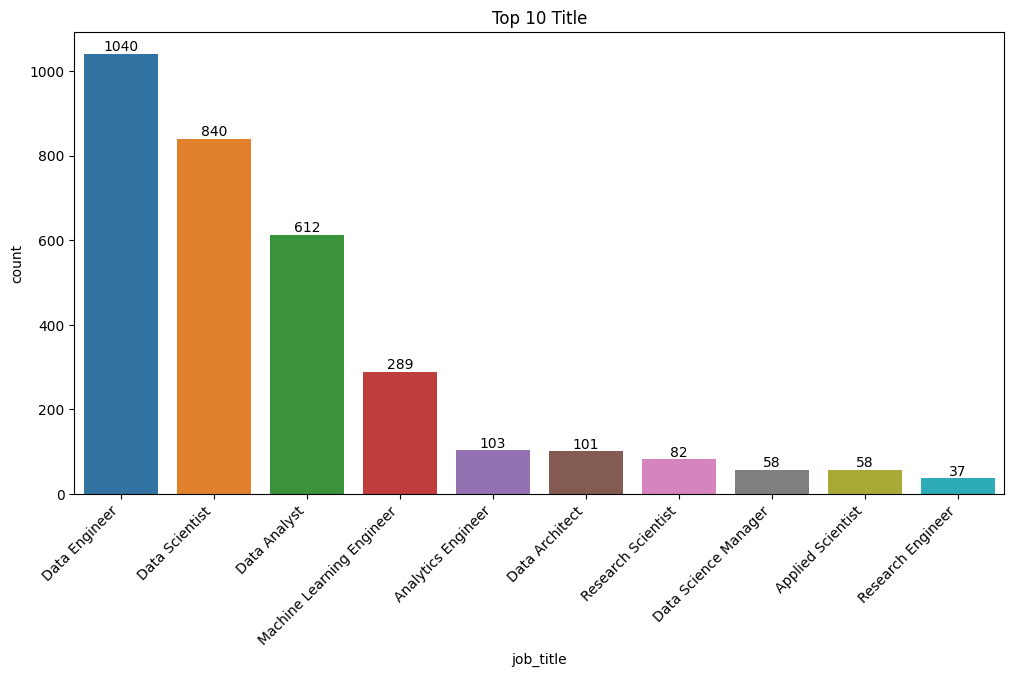

In [14]:
plt.figure(figsize=(10,4),dpi=200)

# Membuat countplot menggunakan Seaborn
plt.figure(figsize=(12, 6))  # Menyesuaikan ukuran plot
ax = sns.countplot(data=df, x="job_title", order=Top_10Title.index)  #
ax = ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Memutar label dan menyesuaikan posisinya

# Menambahkan nilai index pada plot
for i, value in enumerate(Top_10Title.values):
    plt.text(i, value, str(round(value)), ha='center', va='bottom')

# Menambahkan judul pada plot
ax = plt.title("Top 10 Title")

In [15]:
def Freq_df(word_list):
    Freq_dist_nltk = nltk.FreqDist(word_list)
    df_freq = pd.DataFrame.from_dict(Freq_dist_nltk, orient = 'index')
    df_freq.columns = ['Frequency']
    df_freq.index.name = 'Term'
    df_freq = df_freq.sort_values(by = ['Frequency'], ascending = False)
    df_freq = df_freq.reset_index()
    return df_freq

In [16]:
def Word_Cloud(data, title):
    plt.figure(figsize = (12,8))
    wc = WordCloud(width = 1200, height = 600, max_words = 50,
               background_color = 'white',
               max_font_size = 100, random_state = 42)
    wc.generate_from_frequencies(data)

    plt.imshow(wc)
    plt.title(title)
    plt.axis('off')
    plt.show()

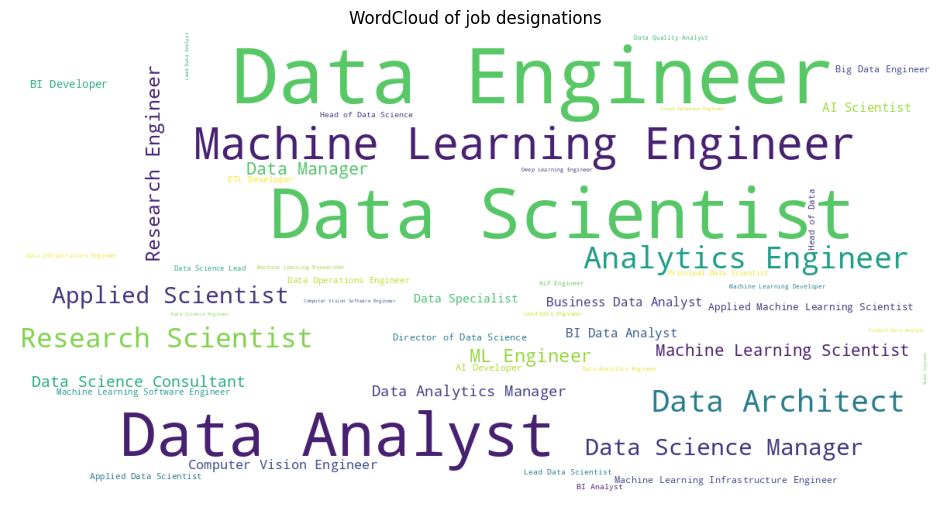

In [17]:
import nltk
from wordcloud import WordCloud

freq_df = Freq_df(df['job_title'].values.tolist())
data = dict(zip(freq_df['Term'].tolist(), freq_df['Frequency'].tolist()))
data = freq_df.set_index('Term').to_dict()['Frequency']

Word_Cloud(data, 'WordCloud of job designations')

### 2. Experience Level

In [18]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


There's 4 categorical values in column 'Experience Level', each are:

* EN, which refers to Entry-level / Junior.

* MI, which refers to Mid-level / Intermediate.

* SE, which refers to Senior-level / Expert.

* EX, which refers to Executive-level / Director

In [42]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


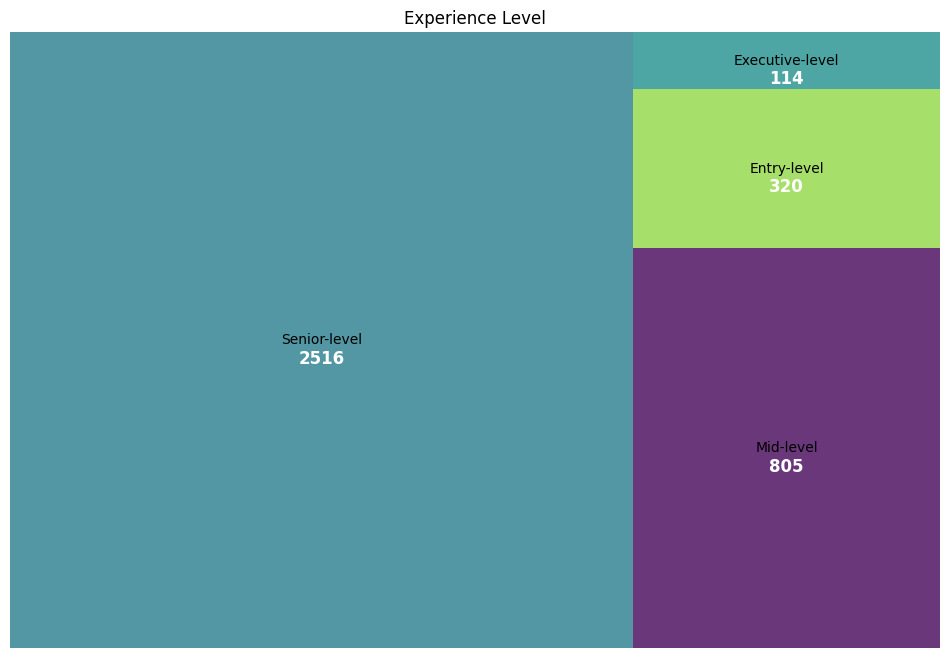

In [65]:
import squarify

df['experience_level'] = df['experience_level'].replace('EN', 'Entry-level')
df['experience_level'] = df['experience_level'].replace('MI', 'Mid-level')
df['experience_level'] = df['experience_level'].replace('SE', 'Senior-level')
df['experience_level'] = df['experience_level'].replace('EX', 'Executive-level')

ex_level = df['experience_level'].value_counts()

plt.figure(figsize=(12, 8))
sns.set_palette("pastel")
sns.color_palette("pastel")

# Plot treemap
squarify.plot(sizes=ex_level.values, label=ex_level.index, alpha=0.8)

# Add text annotations
ax = plt.gca()
for i, (size, label) in enumerate(zip(ex_level.values, ex_level.index)):
    box = ax.get_children()[i]
    x, y, dx, dy = box.get_bbox().bounds
    plt.text(x + dx / 2, y - 3 + dy / 2, f"{size}", ha='center', va='center',
             color='white', fontsize=12, fontweight='bold')

plt.title('Experience Level')
plt.axis('off')
plt.show()


### 3. Employment Type

In [20]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior-level,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,Mid-level,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,Mid-level,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,Senior-level,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,Senior-level,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


There are 4 employment types here :

* PT : Part-time
* FT : Full-time
* CT : Contract
* FL : Freelance

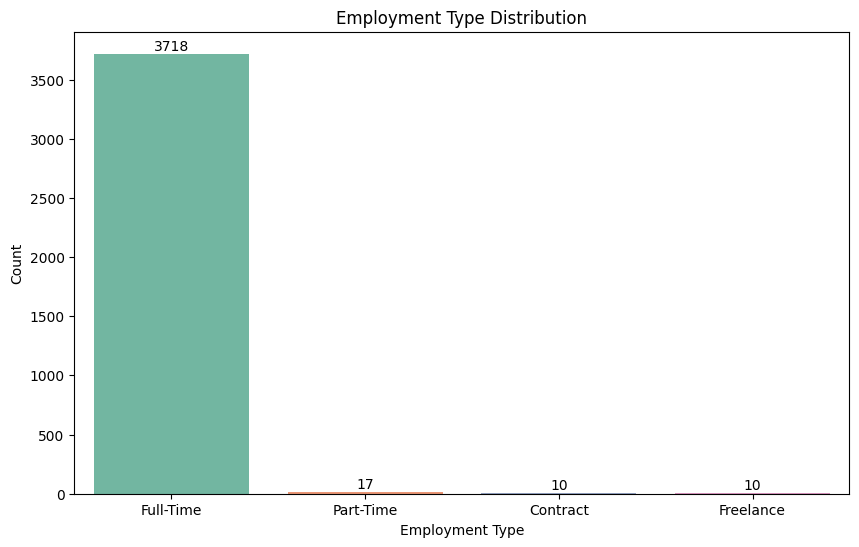

In [21]:
group = df['employment_type'].value_counts()
emp_type = ['Full-Time', 'Part-Time', 'Contract', 'Freelance']

# Menggunakan Seaborn untuk membuat plot batang
plt.figure(figsize=(10, 6))
sns.barplot(x=emp_type, y=group.values, palette='Set2')

# Menambahkan nilai di atas batang
for i, count in enumerate(group.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Menambahkan judul dan label sumbu
plt.title('Employment Type Distribution')
plt.xlabel('Employment Type')
plt.ylabel('Count')

# Menampilkan plot
plt.show()


### 4. Relation between Employee Residence and Company Location

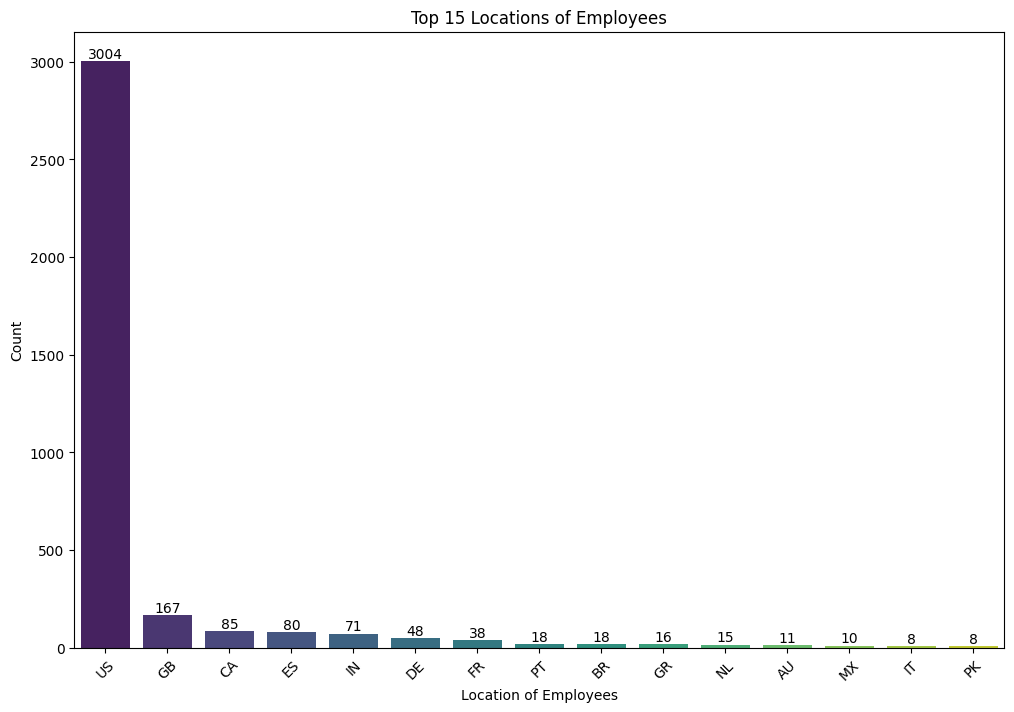

In [69]:
residence = df['employee_residence'].value_counts()

top_15_emp_locations = residence[:15]

plt.figure(figsize=(12, 8))
sns.barplot(y=top_15_emp_locations.values, x=top_15_emp_locations.index,
            palette='viridis')
plt.title('Top 15 Locations of Employees')
plt.xlabel('Location of Employees')
plt.ylabel('Count')
plt.xticks(rotation=45)
for i, value in enumerate(top_15_emp_locations.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.show()


### 5. Comparison of Employee Residence and Company Location

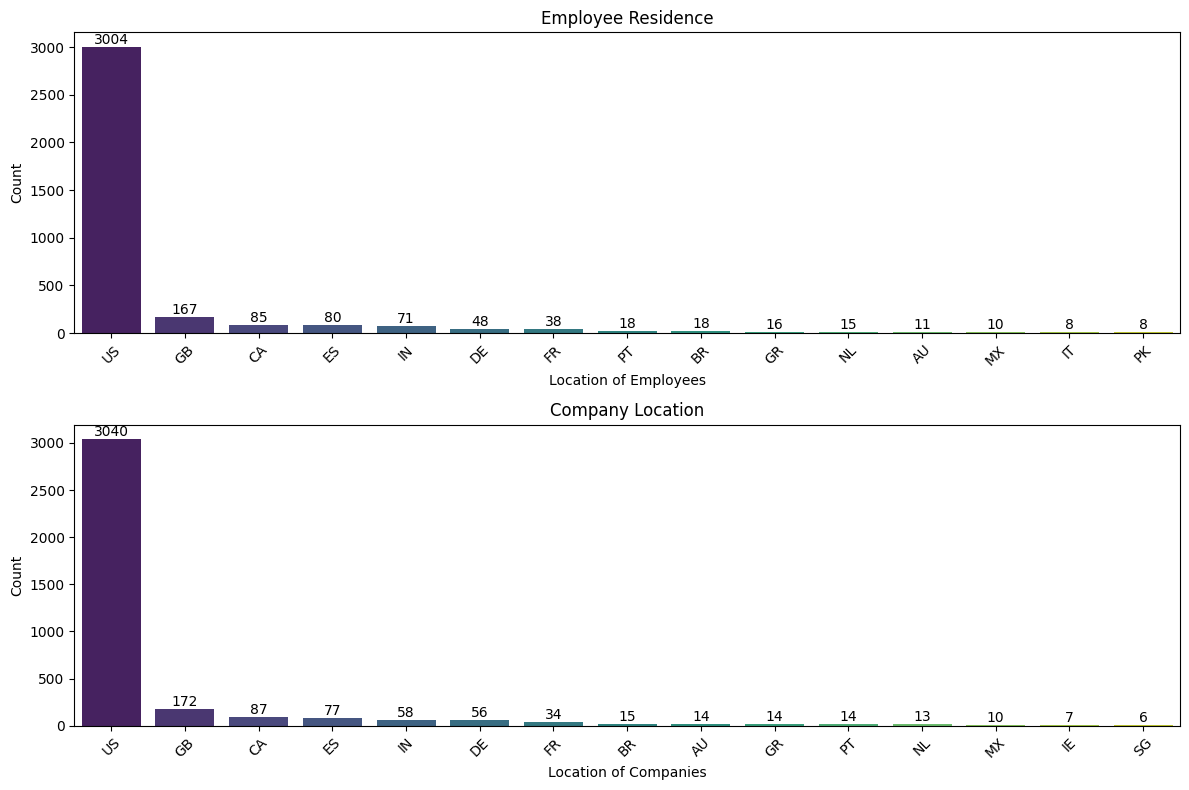

In [68]:
company_location = df['company_location'].value_counts()
top_15_company_location = company_location[:15]

plt.figure(figsize=(12, 8))

# Bar plot for Employee Residence
plt.subplot(2, 1, 1)
sns.barplot(y=top_15_emp_locations.values, x=top_15_emp_locations.index,
            palette='viridis')
plt.title('Employee Residence')
plt.xlabel('Location of Employees')
plt.ylabel('Count')
plt.xticks(rotation=45)
for i, value in enumerate(top_15_emp_locations.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Bar plot for Company Location
plt.subplot(2, 1, 2)
sns.barplot(y=top_15_company_location.values, x=top_15_company_location.index,
            palette='viridis')
plt.title('Company Location')
plt.xlabel('Location of Companies')
plt.ylabel('Count')
plt.xticks(rotation=45)
for i, value in enumerate(top_15_company_location.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()


### 6. Distribution of Company Size

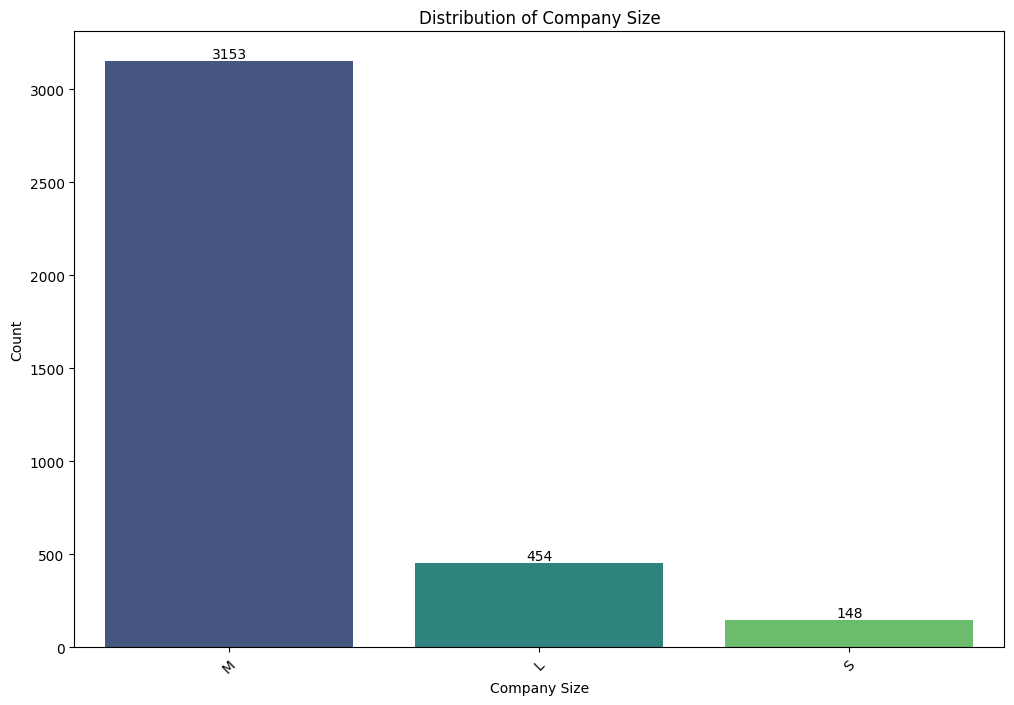

In [70]:
group = df['company_size'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(y=group.values, x=group.index,
            palette='viridis')
plt.title('Distribution of Company Size')
plt.xlabel('Company Size')
plt.ylabel('Count')
plt.xticks(rotation=45)
for i, value in enumerate(group.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.show()


### 7. Work year distribution

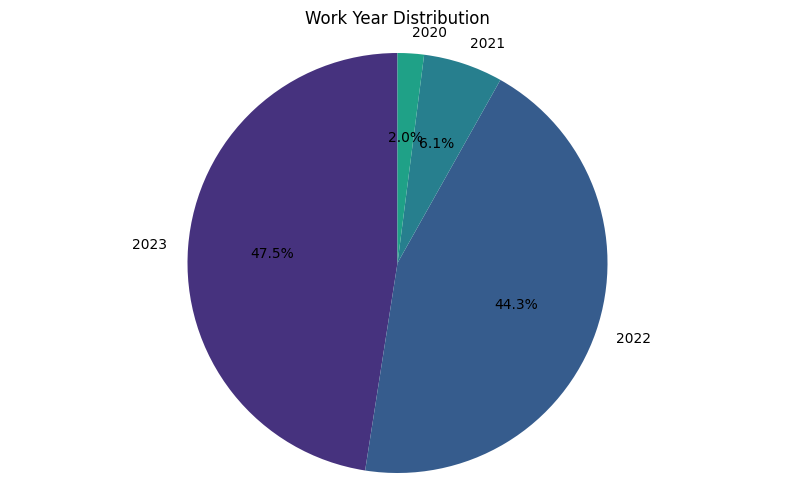

In [71]:
work_year = df['work_year'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(work_year.values, labels=work_year.index, autopct='%1.1f%%',
        colors=sns.color_palette('viridis'), startangle=90)
plt.title('Work Year Distribution')
plt.axis('equal')
plt.show()


Data tahun 2023 menyumbang sekitar 47% dalam kumpulan data, diikuti oleh tahun 2022 dan seterusnya. Terus menunjukkan pertumbuhan luar biasa di bidang ini selama bertahun-tahun!

### 8. Salary in USD

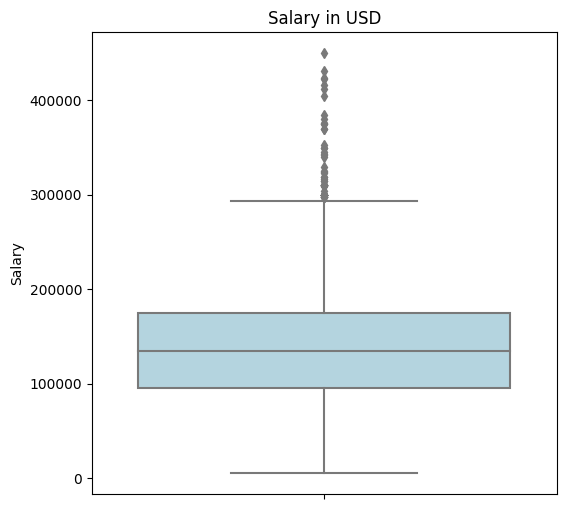

In [73]:
plt.figure(figsize=(6, 6))
sns.boxplot(y=df['salary_in_usd'], color='lightblue')
plt.title('Salary in USD')
plt.ylabel('Salary')
plt.show()


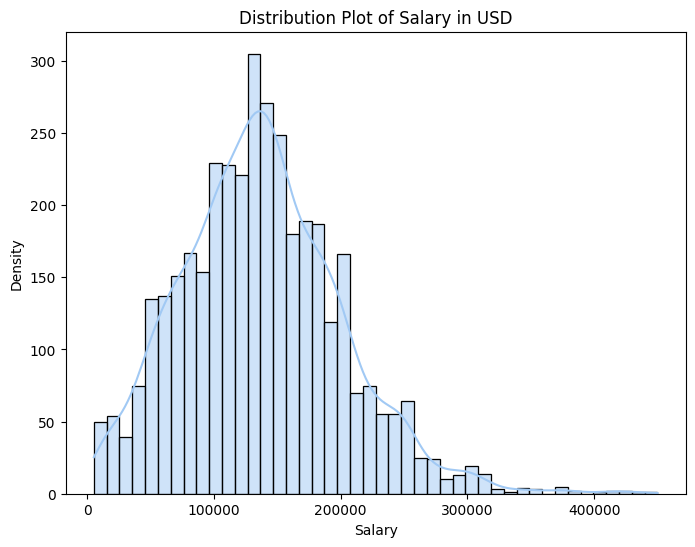

In [74]:
plt.figure(figsize=(8, 6))
sns.histplot(df['salary_in_usd'], kde=True)
plt.title('Distribution Plot of Salary in USD')
plt.xlabel('Salary')
plt.ylabel('Density')
plt.show()

We observe that salary in USD is mostly distributed between 95/100k - 175/180k.

### 9. Remote Ratio

Remote Ratio consists of 3 values :

* 0 : No remote work (less than 20%)

* 50 : Partially remote

* 100 : Fully remote (more than 80%)

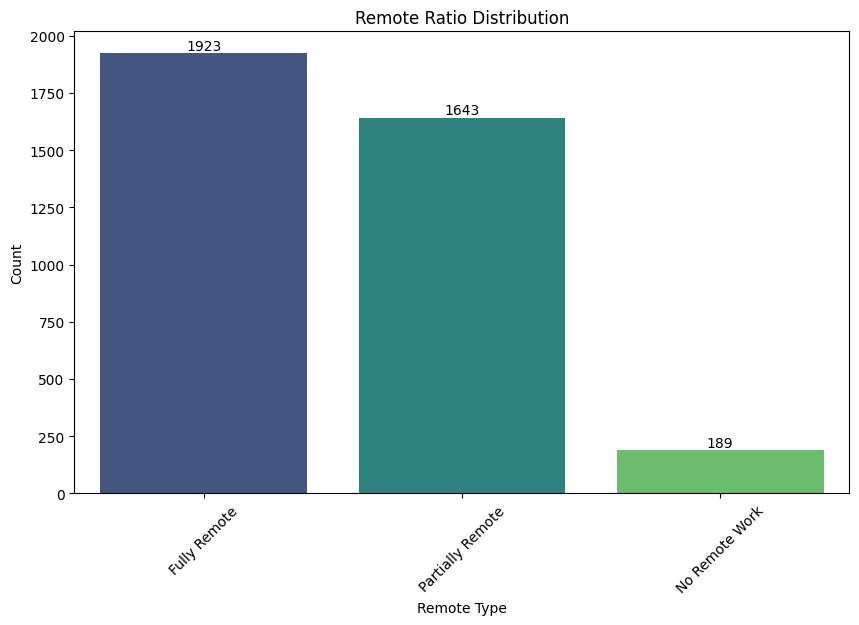

In [75]:
remote_type = ['Fully Remote', 'Partially Remote', 'No Remote Work']
remote_ratio_counts = df['remote_ratio'].value_counts().values

plt.figure(figsize=(10, 6))
sns.barplot(x=remote_type, y=remote_ratio_counts,
            palette='viridis')
plt.title('Remote Ratio Distribution')
plt.xlabel('Remote Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
for i, value in enumerate(remote_ratio_counts):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.show()


Pada tahun 2023, Sebagian besar perusahaan masih menggunakan rute Sepenuhnya Jarak Jauh, diikuti oleh kebijakan Hibrid/Sebagian jarak jauh, dan kemudian kebijakan Tanpa Jarak Jauh.

### 10. Work Year Analysis

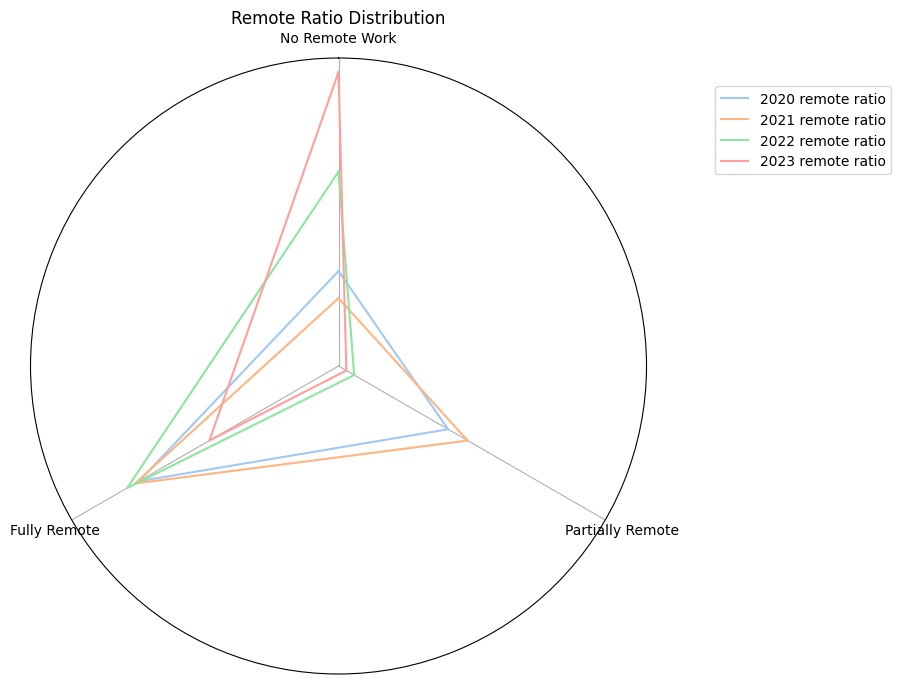

In [77]:
remote_year = df.groupby(['work_year', 'remote_ratio']).size()

ratio_2020 = np.round(remote_year[2020].values / remote_year[2020].values.sum(), 2)
ratio_2021 = np.round(remote_year[2021].values / remote_year[2021].values.sum(), 2)
ratio_2022 = np.round(remote_year[2022].values / remote_year[2022].values.sum(), 2)
ratio_2023 = np.round(remote_year[2023].values / remote_year[2023].values.sum(), 2)

categories = ['No Remote Work', 'Partially Remote', 'Fully Remote']
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

for ratio, year in zip([ratio_2020, ratio_2021, ratio_2022, ratio_2023], range(2020, 2024)):
    ratio = np.append(ratio, ratio[0])
    ax.plot(angles, ratio, label=str(year)+' remote ratio')

plt.title('Remote Ratio Distribution')
plt.legend(loc='lower left', bbox_to_anchor=(1.1, 0.8))
plt.xticks(angles[:-1], categories)
plt.yticks([])
plt.show()


Seperti dari plot rader, kami mengamati bahwa:

Pekerjaan jarak jauh memuncak selama tahun 2021 dan itu dapat dikaitkan dengan pandemi. Seiring waktu, tidak ada kebijakan kerja jarak jauh yang diterapkan lagi seperti yang terjadi pada tahun 2023.

### 11. Experience Level Analysis

Count Experience Level

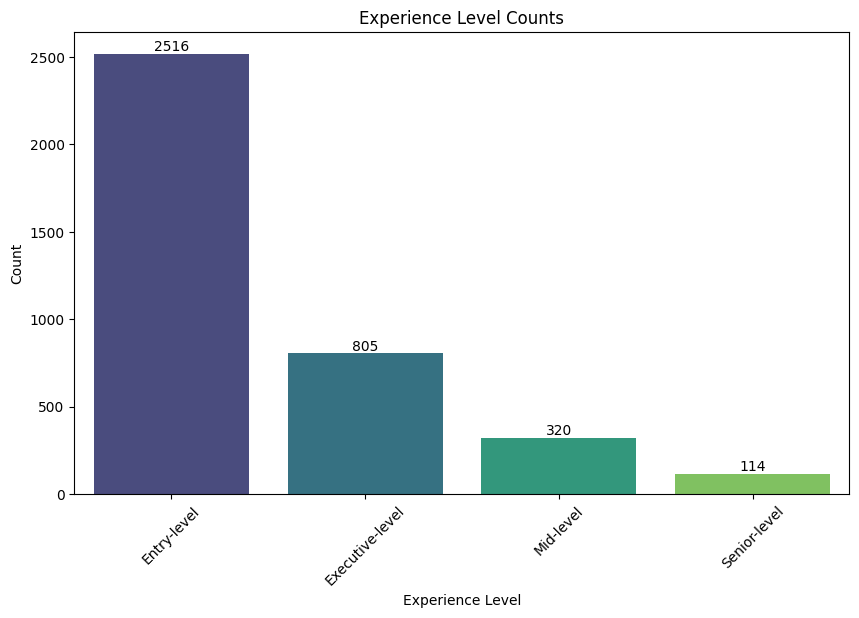

In [101]:
experience_level = ['Entry-level', 'Executive-level', 'Mid-level', 'Senior-level']
experience_level_counts = df['experience_level'].value_counts().values

plt.figure(figsize=(10, 6))
sns.barplot(x=experience_level, y=experience_level_counts,
            palette='viridis')
plt.title('Experience Level Counts')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
for i, value in enumerate(experience_level_counts):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.show()

Dalam Purna Waktu, Lanjut Usia hadir dengan kekuatan penuh diikuti oleh eksekutif dan kemudian yang baru.

Top 5 Designations based on Experience

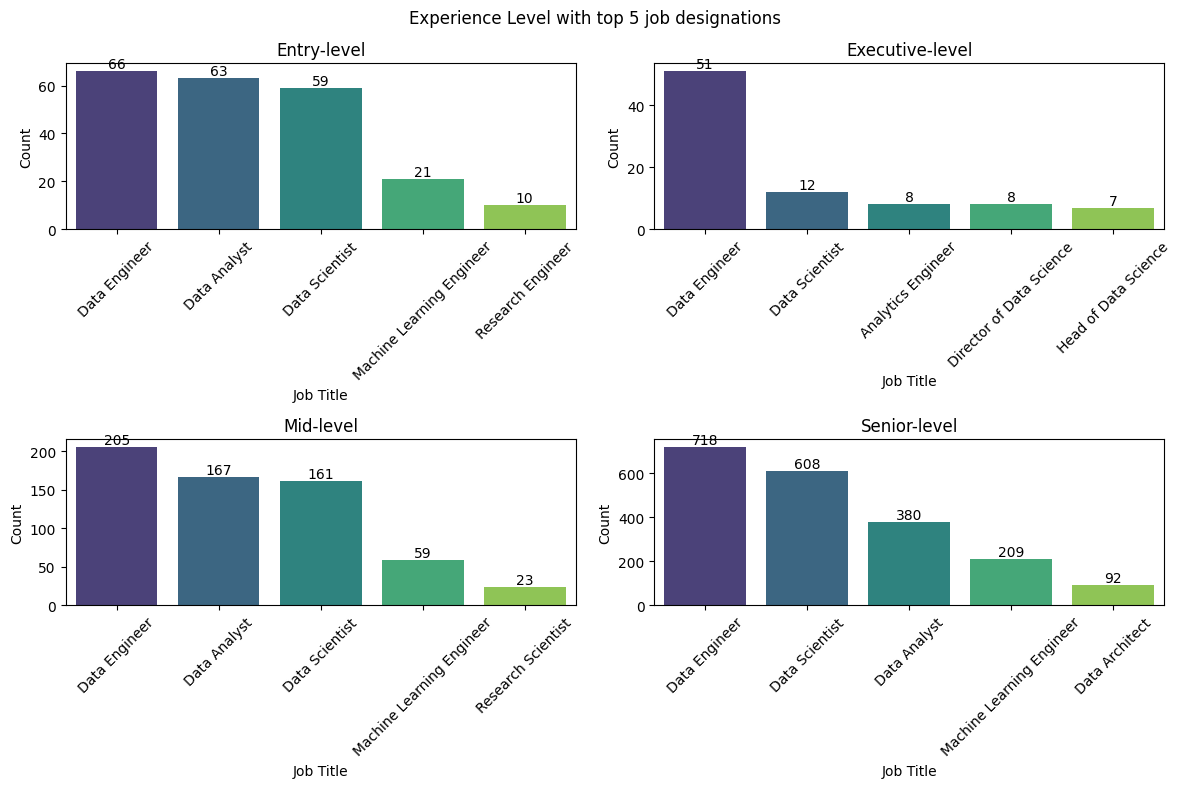

In [113]:
exp_job = df.groupby(['experience_level', 'job_title']).size()

entry_top5 = exp_job['Entry-level'].sort_values(ascending=False)[:5]
executive_top5 = exp_job['Executive-level'].sort_values(ascending=False)[:5]
mid_top5 = exp_job['Mid-level'].sort_values(ascending=False)[:5]
senior_top5 = exp_job['Senior-level'].sort_values(ascending=False)[:5]

experience_levels = ['Entry-level', 'Executive-level', 'Mid-level', 'Senior-level']
top5_data = [entry_top5, executive_top5, mid_top5, senior_top5]

plt.figure(figsize=(12, 8))

for i, level in enumerate(experience_levels):
    plt.subplot(2, 2, i+1)
    sns.barplot(x=top5_data[i].index, y=top5_data[i].values, palette='viridis')
    plt.title(level)
    plt.xlabel('Job Title')
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    # Add value annotations
    for j, value in enumerate(top5_data[i].values):
        plt.text(j, value, str(value), ha='center', va='bottom')

plt.suptitle('Experience Level with top 5 job designations')
plt.tight_layout()
plt.show()


* Arsitek Data hanya memiliki orang-orang berpengalaman senior di dalamnya.

* Entry-level/Junior cenderung memiliki posisi data analyst lebih banyak dibandingkan dengan data scientist dan data engineer dan ML Engineer.

* Tingkat menengah/Menengah cenderung memiliki posisi ilmuwan data dan insinyur data daripada analis.

* Jelas, tidak ada pekerjaan ilmuwan data dan analis dengan tingkat Eksekutif / Direktur tetapi cenderung memiliki posisi insinyur data dan direktur.

* Research Scientist hanya terdiri dari posisi mid level/intermediate

Company Size based on Experience

In [120]:
exp_size = df.groupby(['experience_level','company_size']).size()
fig = go.Figure(data = [
    go.Bar(name = 'Entry-level', x = exp_size['Entry-level'].index,
           y = exp_size['Entry-level'].values, text = exp_size['Entry-level'].values),
    go.Bar(name = 'Executive-level', x = exp_size['Executive-level'].index,
           y = exp_size['Executive-level'].values, text = exp_size['Executive-level'].values),
    go.Bar(name = 'Mid-level', x = exp_size['Mid-level'].index,
           y = exp_size['Mid-level'].values, text = exp_size['Mid-level'].values),
    go.Bar(name = 'Senior-level', x = exp_size['Senior-level'].index,
           y = exp_size['Senior-level'].values, text = exp_size['Senior-level'].values),
])
fig.update_layout(xaxis_tickangle = -45, title = 'Experience Level with Company Size')

fig.show()

* Untuk perusahaan berukuran besar, kebanyakan senior diikuti oleh menengah dan kemudian fresher. Sangat sedikit eksekutif yang terlihat.

* Untuk perusahaan berukuran menengah, ini terutama terdiri dari level senior kemudian diikuti oleh perantara dan kemudian entry leveler. Eksekutif sedikit menonjol dibandingkan dengan perusahaan berukuran besar.

* Untuk perusahaan kecil/startup, kami melihatnya terdiri dari tiga level selain eksekutif secara proporsional.

### ----------

### 12. Salary Analysis

Salary based on work year

In [122]:
work_2020 = df.loc[(df['work_year'] == 2020)]
work_2021 = df.loc[(df['work_year'] == 2021)]
work_2022 = df.loc[(df['work_year'] == 2022)]
work_2023 = df.loc[(df['work_year'] == 2023)]

hist_data = [work_2020['salary_in_usd'], work_2021['salary_in_usd'],
            work_2022['salary_in_usd'], work_2023['salary_in_usd']]
group_labels = ['2020 salary', '2021 salary', '2022 salary', '2023 salary']

year_salary = pd.DataFrame(columns = ['2020', '2021', '2022', '2023'])
year_salary['2020'] = work_2020.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values
year_salary['2021'] = work_2021.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values
year_salary['2022'] = work_2022.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values
year_salary['2023'] = work_2023.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values

fig1 = ff.create_distplot(hist_data, group_labels, show_hist = False)
fig2 = go.Figure(data=px.bar(x = year_salary.columns,
                            y = year_salary.values.tolist()[0],
                            color = year_salary.columns,
                            title = 'Mean Salary by Work Year'))

fig1.update_layout(title = 'Salary Distribution based on Work Year')
fig2.update_layout(xaxis_title = "Work Year", yaxis_title = "Mean Salary (k)")
fig1.show()
fig2.show()

Ada jumlah gaji yang lebih tinggi pada tahun 2023 dan 2022 daripada level pada tahun 2021 dan 2020.

Tingkat gaji pada tahun 2021 dan 2020 hampir sama.

Salary based on Experience

In [34]:
exp_salary = df[['experience_level','salary_in_usd']]

entry_salary = exp_salary.loc[exp_salary['experience_level'] == 'Entry-level']
executive_salary = exp_salary.loc[exp_salary['experience_level'] == 'Executive-level']
mid_salary = exp_salary.loc[exp_salary['experience_level'] == 'Mid-level']
senior_salary = exp_salary.loc[exp_salary['experience_level'] == 'Senior-level']

hist_data = [entry_salary['salary_in_usd'], mid_salary['salary_in_usd'], senior_salary['salary_in_usd'], executive_salary['salary_in_usd']]
group_labels = ['Entry-level', 'Mid-level', 'Senior-level', 'Executive-level']

means = [entry_salary['salary_in_usd'].mean(), mid_salary['salary_in_usd'].mean(),
    senior_salary['salary_in_usd'].mean(), executive_salary['salary_in_usd'].mean(),]

fig1 = ff.create_distplot(hist_data, group_labels, show_hist = False)
fig2 = go.Figure(data=px.bar(x = group_labels, y = means, color = group_labels,
                            title = 'Mean Salary by Experience Level'))

fig1.update_layout(title = 'Salary Distribution based on Experience')
fig2.update_layout(xaxis_title = "Experience Level", yaxis_title = "Mean Salary (k) ")
fig1.show()
fig2.show()

Kami mengamati bahwa tingkat pemula didistribusikan bersama dengan gaji yang lebih rendah sementara tingkat eksekutif diplot dengan gaji yang lebih tinggi.

Salary based on Company Size

In [35]:
company_size = df[['company_size','salary_in_usd']]
small = exp_salary.loc[company_size['company_size'] == 'S']
mid = exp_salary.loc[company_size['company_size'] == 'M']
large = exp_salary.loc[company_size['company_size'] == 'L']
hist_data = [small['salary_in_usd'], mid['salary_in_usd'], large['salary_in_usd']]
group_labels = ['Company Size: Small', 'Company Size: Mid', 'Company Size: Large']

means = [small['salary_in_usd'].mean(), mid['salary_in_usd'].mean(), large['salary_in_usd'].mean()]

fig1 = ff.create_distplot(hist_data, group_labels, show_hist = False)
fig2 = go.Figure(data = px.bar(x = group_labels, y = means, color = group_labels,
                title = 'Mean Salary by Company Size'))

fig1.update_layout(title = 'Salary Distribution based onk Company Size')
fig2.update_layout( xaxis_title = "Company Size", yaxis_title = "Mean Salary (k)")
fig1.show()
fig2.show()

Jelas bahwa perusahaan berukuran sedang didistribusikan bersama dengan gaji yang lebih tinggi, dan perusahaan berukuran besar memiliki gaji yang lebih tinggi daripada perusahaan berukuran kecil.

Dengan demikian dapat disimpulkan bahwa perusahaan besar belum tentu memiliki gaji yang lebih tinggi dari perusahaan menengah.

Salary Based on Job Title

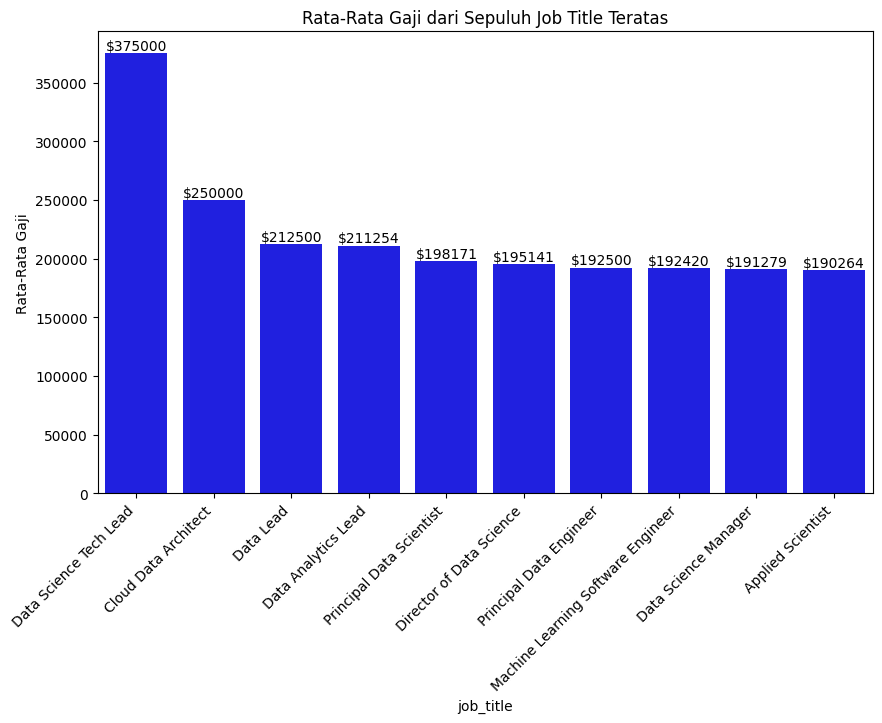

In [36]:
# Mengelompokkan data berdasarkan 'job_title' dan menghitung rata-rata gaji
average_salary = df.groupby('job_title')['salary_in_usd'].mean()

# Mengurutkan hasil rata-rata gaji dari yang tertinggi ke terendah
sorted_average_salary = average_salary.sort_values(ascending=False)

# Mengambil 10 job_title teratas
top_10_salary = sorted_average_salary.head(10)

# Membuat plot menggunakan Seaborn
plt.figure(figsize=(10, 6))  # Menyesuaikan ukuran plot
ax = sns.barplot(x=top_10_salary.index, y=top_10_salary.values, color='blue')

ax = ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Memutar label dan menyesuaikan posisinya

# Menambahkan nilai index pada plot
for i, value in enumerate(top_10_salary.values):
    plt.text(i, value, str(f"${round(value)}"), ha='center', va='bottom')

# Menambahkan judul dan label sumbu
plt.title('Rata-Rata Gaji dari Sepuluh Job Title Teratas')
plt.ylabel('Rata-Rata Gaji')

# Menampilkan plot
plt.show()

### 13. Korelasi Antar Feature

<ipython-input-37-505c1eef9f65>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Text(0.5, 1.0, 'Confusion Matrix')

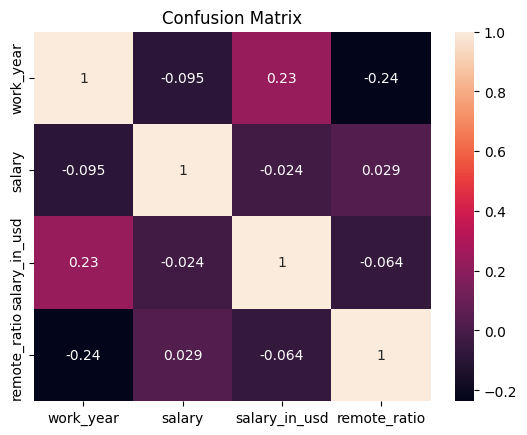

In [37]:
fig, ax = plt.subplots()
sns.heatmap(df.corr(), annot = True)
plt.title('Confusion Matrix')